In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\aaronhxzhang\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
file = r'''C:\Users\aaronhxzhang\2019CrashDatasetNumberOne.xlsx'''
data = pd.ExcelFile(file)
df1 = data.parse('Sheet1')
df1               #read the dataset (for this new data, I cut out a lot of the useless categories)

,Crash Date,City/Town,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type,Crash Number
0,2017-04-03,FALL RIVER,Property damage only (none injured),0,0,2,Rear-end,35-44,65-74,No hit and run,Dry,Daylight,Clear,0,Not at junction,4347478
1,2017-04-04,FALL RIVER,Property damage only (none injured),0,0,2,"Sideswipe, opposite direction",25-34,25-34,No hit and run,Wet,Dawn,Rain,0,T-intersection,4347479
2,2017-04-04,FALL RIVER,Non-fatal injury,2,0,2,Rear-end,25-34,25-34,No hit and run,Wet,Daylight,Cloudy/Rain,0,Not at junction,4347480
3,2017-04-03,GLOUCESTER,Non-fatal injury,1,0,2,"Sideswipe, opposite direction",35-44,75-84,No hit and run,Dry,Dark - lighted roadway,Clear/Unknown,0,Not at junction,4347472
4,2017-04-04,BROOKLINE,Property damage only (none injured),0,0,2,Rear-end,25-34,45-54,No hit and run,Wet,Dark - lighted roadway,Rain,35,Not reported,4347473
5,2017-04-03,FALL RIVER,Property damage only (none injured),0,0,2,Angle,25-34,45-54,No hit and run,Dry,Daylight,Clear/Cloudy,0,Four-way intersection,4347477
6,2017-04-04,HOLYOKE,Property damage only (none injured),0,0,1,Single vehicle crash,21-24,21-24,No hit and run,Wet,Daylight,Rain,0,Not at junction,4347482
7,2017-04-02,BURLINGTON,Property damage only (none injured),0,0,2,Rear-end,35-44,55-64,No hit and run,Dry,Daylight,Clear,55,Not at junction,4347453
8,2017-04-02,LYNNFIELD,Non-fatal injury,3,0,2,Angle,45-54,55-64,No hit and run,Dry,Daylight,Clear,55,On-ramp,4347454
9,2017-04-02,LEXINGTON,Property damage only (none injured),0,0,4,Rear-end,16-20,45-54,No hit and run,Dry,Daylight,Clear,55,Not at junction,4347455


In [3]:
df1.columns

Index(['Crash Date', 'City/Town', 'Crash Severity',
       'Number of NonFatal Injuries', 'Number of Fatal Injuries',
       'Number of Vehicles', 'Manner of Collision',
       'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known',
       'Hit & Run', 'Road Surface', 'Ambient Light', 'Weather Condition',
       'Speed Limit', 'Roadway Intersection Type', 'Crash Number'],
      dtype='object')

In [4]:
print(df1.shape)
print(list(df1.columns))

(953, 16)
['Crash Date', 'City/Town', 'Crash Severity', 'Number of NonFatal Injuries', 'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision', 'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known', 'Hit & Run', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Speed Limit', 'Roadway Intersection Type', 'Crash Number']


In [5]:
df1.head()

,Crash Date,City/Town,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type,Crash Number
0,2017-04-03,FALL RIVER,Property damage only (none injured),0,0,2,Rear-end,35-44,65-74,No hit and run,Dry,Daylight,Clear,0,Not at junction,4347478
1,2017-04-04,FALL RIVER,Property damage only (none injured),0,0,2,"Sideswipe, opposite direction",25-34,25-34,No hit and run,Wet,Dawn,Rain,0,T-intersection,4347479
2,2017-04-04,FALL RIVER,Non-fatal injury,2,0,2,Rear-end,25-34,25-34,No hit and run,Wet,Daylight,Cloudy/Rain,0,Not at junction,4347480
3,2017-04-03,GLOUCESTER,Non-fatal injury,1,0,2,"Sideswipe, opposite direction",35-44,75-84,No hit and run,Dry,Dark - lighted roadway,Clear/Unknown,0,Not at junction,4347472
4,2017-04-04,BROOKLINE,Property damage only (none injured),0,0,2,Rear-end,25-34,45-54,No hit and run,Wet,Dark - lighted roadway,Rain,35,Not reported,4347473


 Our goal is to ultimately figure out what factors have the strongest correlation with crashes that have injuries involved in them 

In [6]:
#First we will cut down on some categories that have too many options

In [6]:
df1['Crash Severity'].unique()

array(['Property damage only (none injured)', 'Non-fatal injury',
       'Not Reported', 'Unknown', 'Fatal injury'], dtype=object)

In [7]:
df1['Crash Severity']=np.where(df1['Crash Severity'] =='Property damage only (none injured)', 'Minor', df1['Crash Severity'])
df1['Crash Severity']=np.where(df1['Crash Severity'] =='Non-fatal injury', 'Medium', df1['Crash Severity'])
df1['Crash Severity']=np.where(df1['Crash Severity'] =='Fatal injury', 'Major', df1['Crash Severity'])
df1['Crash Severity']=np.where(df1['Crash Severity'] =='Not Reported', 'Unknown', df1['Crash Severity'])                               

In [8]:
df1['Crash Severity'].unique()

array(['Minor', 'Medium', 'Unknown', 'Major'], dtype=object)

In [9]:
df1 = df1.drop(columns='City/Town')

In [10]:
df1 = df1.drop(columns='Crash Date')
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type,Crash Number
0,Minor,0,0,2,Rear-end,35-44,65-74,No hit and run,Dry,Daylight,Clear,0,Not at junction,4347478
1,Minor,0,0,2,"Sideswipe, opposite direction",25-34,25-34,No hit and run,Wet,Dawn,Rain,0,T-intersection,4347479
2,Medium,2,0,2,Rear-end,25-34,25-34,No hit and run,Wet,Daylight,Cloudy/Rain,0,Not at junction,4347480
3,Medium,1,0,2,"Sideswipe, opposite direction",35-44,75-84,No hit and run,Dry,Dark - lighted roadway,Clear/Unknown,0,Not at junction,4347472
4,Minor,0,0,2,Rear-end,25-34,45-54,No hit and run,Wet,Dark - lighted roadway,Rain,35,Not reported,4347473
5,Minor,0,0,2,Angle,25-34,45-54,No hit and run,Dry,Daylight,Clear/Cloudy,0,Four-way intersection,4347477
6,Minor,0,0,1,Single vehicle crash,21-24,21-24,No hit and run,Wet,Daylight,Rain,0,Not at junction,4347482
7,Minor,0,0,2,Rear-end,35-44,55-64,No hit and run,Dry,Daylight,Clear,55,Not at junction,4347453
8,Medium,3,0,2,Angle,45-54,55-64,No hit and run,Dry,Daylight,Clear,55,On-ramp,4347454
9,Minor,0,0,4,Rear-end,16-20,45-54,No hit and run,Dry,Daylight,Clear,55,Not at junction,4347455


In [11]:
df1 = df1.drop(columns='Crash Number')
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,35-44,65-74,No hit and run,Dry,Daylight,Clear,0,Not at junction
1,Minor,0,0,2,"Sideswipe, opposite direction",25-34,25-34,No hit and run,Wet,Dawn,Rain,0,T-intersection
2,Medium,2,0,2,Rear-end,25-34,25-34,No hit and run,Wet,Daylight,Cloudy/Rain,0,Not at junction
3,Medium,1,0,2,"Sideswipe, opposite direction",35-44,75-84,No hit and run,Dry,Dark - lighted roadway,Clear/Unknown,0,Not at junction
4,Minor,0,0,2,Rear-end,25-34,45-54,No hit and run,Wet,Dark - lighted roadway,Rain,35,Not reported
5,Minor,0,0,2,Angle,25-34,45-54,No hit and run,Dry,Daylight,Clear/Cloudy,0,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,21-24,21-24,No hit and run,Wet,Daylight,Rain,0,Not at junction
7,Minor,0,0,2,Rear-end,35-44,55-64,No hit and run,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-54,55-64,No hit and run,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-20,45-54,No hit and run,Dry,Daylight,Clear,55,Not at junction


In [12]:
df1['Manner of Collision'].unique()

array(['Rear-end', 'Sideswipe, opposite direction', 'Angle',
       'Single vehicle crash', 'Sideswipe, same direction', 'Unknown',
       'Head-on', 'Rear-to-rear', 'Not reported', nan], dtype=object)

In [13]:
df1['Manner of Collision']=np.where(df1['Manner of Collision'] =='Sideswipe, opposite direction', 'Sideswipe', df1['Manner of Collision'])
df1['Manner of Collision']=np.where(df1['Manner of Collision'] =='Sideswipe, same direction', 'Sideswipe', df1['Manner of Collision'])

In [14]:
df1['Manner of Collision']=np.where(df1['Manner of Collision'] =='Rear-to-rear', 'Rear-end', df1['Manner of Collision'])
df1['Manner of Collision']=np.where(df1['Manner of Collision'] == 'nan', 'Unknown', df1['Manner of Collision'])

In [15]:
df1['Manner of Collision'].unique()

array(['Rear-end', 'Sideswipe', 'Angle', 'Single vehicle crash',
       'Unknown', 'Head-on', 'Not reported', nan], dtype=object)

In [16]:
df1['Hit & Run'].unique()

array(['No hit and run', 'Yes, hit and run', nan], dtype=object)

In [17]:
df1['Hit & Run']=np.where(df1['Hit & Run'] =='No hit and run', 'No', df1['Hit & Run'])
df1['Hit & Run']=np.where(df1['Hit & Run'] == 'Yes, hit and run', 'Yes', df1['Hit & Run'])

In [18]:
df1['Hit & Run'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,35-44,65-74,No,Dry,Daylight,Clear,0,Not at junction
1,Minor,0,0,2,Sideswipe,25-34,25-34,No,Wet,Dawn,Rain,0,T-intersection
2,Medium,2,0,2,Rear-end,25-34,25-34,No,Wet,Daylight,Cloudy/Rain,0,Not at junction
3,Medium,1,0,2,Sideswipe,35-44,75-84,No,Dry,Dark - lighted roadway,Clear/Unknown,0,Not at junction
4,Minor,0,0,2,Rear-end,25-34,45-54,No,Wet,Dark - lighted roadway,Rain,35,Not reported
5,Minor,0,0,2,Angle,25-34,45-54,No,Dry,Daylight,Clear/Cloudy,0,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,21-24,21-24,No,Wet,Daylight,Rain,0,Not at junction
7,Minor,0,0,2,Rear-end,35-44,55-64,No,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-54,55-64,No,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-20,45-54,No,Dry,Daylight,Clear,55,Not at junction


In [20]:
df1['Weather Condition'].unique()

array(['Clear', 'Rain', 'Cloudy/Rain', 'Clear/Unknown', 'Clear/Cloudy',
       'Not Reported', 'Cloudy', 'Clear/Clear', 'Snow/Other', 'Unknown',
       'Cloudy/Clear', 'Unknown/Other', 'Clear/Other', 'Rain/Cloudy',
       'Clear/Rain', 'Sleet, hail (freezing rain or drizzle)',
       'Rain/Rain', 'Rain/Fog, smog, smoke', 'Snow/Cloudy',
       'Cloudy/Unknown', 'Rain/Snow', 'Rain/Unknown', 'Snow',
       'Rain/Sleet, hail (freezing rain or drizzle)', 'Rain/Other',
       'Cloudy/Cloudy', 'Unknown/Unknown', 'Snow/Rain', 'Cloudy/Other',
       'Rain/Clear'], dtype=object)

In [21]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear/Unknown', 'Clear', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear/Cloudy', 'Clear', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear/Clear', 'Clear', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear/Other', 'Clear', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear', 'Clear', df1['Weather Condition'])

In [22]:
df1['Weather Condition'].unique()

array(['Clear', 'Rain', 'Cloudy/Rain', 'Not Reported', 'Cloudy',
       'Snow/Other', 'Unknown', 'Cloudy/Clear', 'Unknown/Other',
       'Rain/Cloudy', 'Clear/Rain',
       'Sleet, hail (freezing rain or drizzle)', 'Rain/Rain',
       'Rain/Fog, smog, smoke', 'Snow/Cloudy', 'Cloudy/Unknown',
       'Rain/Snow', 'Rain/Unknown', 'Snow',
       'Rain/Sleet, hail (freezing rain or drizzle)', 'Rain/Other',
       'Cloudy/Cloudy', 'Unknown/Unknown', 'Snow/Rain', 'Cloudy/Other',
       'Rain/Clear'], dtype=object)

In [23]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy/Rain', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Cloudy', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Clear/Rain', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Rain', 'Rainy', df1['Weather Condition'])

In [24]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Not Reported', 'Cloudy', 'Snow/Other',
       'Unknown', 'Cloudy/Clear', 'Unknown/Other',
       'Sleet, hail (freezing rain or drizzle)', 'Rain/Fog, smog, smoke',
       'Snow/Cloudy', 'Cloudy/Unknown', 'Rain/Snow', 'Rain/Unknown',
       'Snow', 'Rain/Sleet, hail (freezing rain or drizzle)',
       'Rain/Other', 'Cloudy/Cloudy', 'Unknown/Unknown', 'Snow/Rain',
       'Cloudy/Other', 'Rain/Clear'], dtype=object)

In [25]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy', 'Cloudy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy/Clear', 'Cloudy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy/Unknown', 'Cloudy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy/Cloudy', 'Cloudy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Cloudy/Other', 'Cloudy', df1['Weather Condition'])

In [26]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Not Reported', 'Cloudy', 'Snow/Other',
       'Unknown', 'Unknown/Other',
       'Sleet, hail (freezing rain or drizzle)', 'Rain/Fog, smog, smoke',
       'Snow/Cloudy', 'Rain/Snow', 'Rain/Unknown', 'Snow',
       'Rain/Sleet, hail (freezing rain or drizzle)', 'Rain/Other',
       'Unknown/Unknown', 'Snow/Rain', 'Rain/Clear'], dtype=object)

In [27]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Snow/Other', 'Snowy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Snow/Cloudy', 'Snowy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Snow', 'Snowy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Snow', 'Snowy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Snow/Rain', 'Snowy', df1['Weather Condition'])

In [28]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Not Reported', 'Cloudy', 'Snowy', 'Unknown',
       'Unknown/Other', 'Sleet, hail (freezing rain or drizzle)',
       'Rain/Fog, smog, smoke', 'Rain/Unknown',
       'Rain/Sleet, hail (freezing rain or drizzle)', 'Rain/Other',
       'Unknown/Unknown', 'Rain/Clear'], dtype=object)

In [29]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Fog, smog, smoke', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Unknown', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Other', 'Rainy', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Clear', 'Rainy', df1['Weather Condition'])

In [30]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Not Reported', 'Cloudy', 'Snowy', 'Unknown',
       'Unknown/Other', 'Sleet, hail (freezing rain or drizzle)',
       'Rain/Sleet, hail (freezing rain or drizzle)', 'Unknown/Unknown'],
      dtype=object)

In [31]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Not Reported', 'Unknown', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Unknown', 'Unknown', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Unknown/Other', 'Unknown', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Unknown/Unknown', 'Unknown', df1['Weather Condition'])

In [32]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Unknown', 'Cloudy', 'Snowy',
       'Sleet, hail (freezing rain or drizzle)',
       'Rain/Sleet, hail (freezing rain or drizzle)'], dtype=object)

In [33]:
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Sleet, hail (freezing rain or drizzle)', 'Sleet/Hail', df1['Weather Condition'])
df1['Weather Condition']=np.where(df1['Weather Condition'] =='Rain/Sleet, hail (freezing rain or drizzle)', 'Sleet/Hail', df1['Weather Condition'])

In [34]:
df1['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Unknown', 'Cloudy', 'Snowy', 'Sleet/Hail'],
      dtype=object)

In [35]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,35-44,65-74,No,Dry,Daylight,Clear,0,Not at junction
1,Minor,0,0,2,Sideswipe,25-34,25-34,No,Wet,Dawn,Rainy,0,T-intersection
2,Medium,2,0,2,Rear-end,25-34,25-34,No,Wet,Daylight,Rainy,0,Not at junction
3,Medium,1,0,2,Sideswipe,35-44,75-84,No,Dry,Dark - lighted roadway,Clear,0,Not at junction
4,Minor,0,0,2,Rear-end,25-34,45-54,No,Wet,Dark - lighted roadway,Rainy,35,Not reported
5,Minor,0,0,2,Angle,25-34,45-54,No,Dry,Daylight,Clear,0,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,21-24,21-24,No,Wet,Daylight,Rainy,0,Not at junction
7,Minor,0,0,2,Rear-end,35-44,55-64,No,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-54,55-64,No,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-20,45-54,No,Dry,Daylight,Clear,55,Not at junction


KeyError: "labels ['Linked RI Opposing Number of Travel Lanes'] not contained in axis"

In [37]:
df1['Age of Driver - Youngest Known'].unique()

array(['35-44', '25-34', '21-24', '45-54', '16-20', '65-74', nan, '55-64',
       '75-84', '<16', '>84'], dtype=object)

In [38]:
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='65-74', '65+', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='75-84', '65+', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='16-20', '16-24', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='21-24', '16-24', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='25-34', '25-44', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='35-44', '25-44', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='45-54', '45-64', df1['Age of Driver - Youngest Known'])
df1['Age of Driver - Youngest Known']=np.where(df1['Age of Driver - Youngest Known'] =='55-64', '45-64', df1['Age of Driver - Youngest Known'])

In [39]:
df1['Age of Driver - Youngest Known'].unique()

array(['25-44', '16-24', '45-64', '65+', nan, '<16', '>84'], dtype=object)

In [40]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,25-44,65-74,No,Dry,Daylight,Clear,0,Not at junction
1,Minor,0,0,2,Sideswipe,25-44,25-34,No,Wet,Dawn,Rainy,0,T-intersection
2,Medium,2,0,2,Rear-end,25-44,25-34,No,Wet,Daylight,Rainy,0,Not at junction
3,Medium,1,0,2,Sideswipe,25-44,75-84,No,Dry,Dark - lighted roadway,Clear,0,Not at junction
4,Minor,0,0,2,Rear-end,25-44,45-54,No,Wet,Dark - lighted roadway,Rainy,35,Not reported
5,Minor,0,0,2,Angle,25-44,45-54,No,Dry,Daylight,Clear,0,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,16-24,21-24,No,Wet,Daylight,Rainy,0,Not at junction
7,Minor,0,0,2,Rear-end,25-44,55-64,No,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-64,55-64,No,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-24,45-54,No,Dry,Daylight,Clear,55,Not at junction


In [41]:
df1['Speed Limit'].unique()

array([  0,  35,  55,  50,  65,  25,  30,  40,  10,  20,  45,  15,  60,
         5, 325], dtype=int64)

In [50]:
df1['Speed Limit']=np.where(df1['Speed Limit'] =='0', '20', df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] =='10', '20', df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] =='15', '20', df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] =='325', '35', df1['Speed Limit'])

C:\Users\aaronhxzhang\Anaconda\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [42]:
df1['Speed Limit'].unique()

array([  0,  35,  55,  50,  65,  25,  30,  40,  10,  20,  45,  15,  60,
         5, 325], dtype=int64)

In [43]:
df1['Speed Limit']=np.where(df1['Speed Limit'] == 0, 20, df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] == 10, 20, df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] == 15, 20, df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] == 325, 35, df1['Speed Limit'])

In [44]:
df1['Speed Limit'].unique()

array([20, 35, 55, 50, 65, 25, 30, 40, 45, 60,  5], dtype=int64)

In [45]:
df1['Speed Limit']=np.where(df1['Speed Limit'] == 5, 20, df1['Speed Limit'])

In [46]:
df1['Speed Limit']=np.where(df1['Speed Limit'] == 60, 65, df1['Speed Limit'])
df1['Speed Limit']=np.where(df1['Speed Limit'] == 50, 55, df1['Speed Limit'])

In [47]:
df1['Speed Limit'].unique()

array([20, 35, 55, 65, 25, 30, 40, 45], dtype=int64)

In [48]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,25-44,65-74,No,Dry,Daylight,Clear,20,Not at junction
1,Minor,0,0,2,Sideswipe,25-44,25-34,No,Wet,Dawn,Rainy,20,T-intersection
2,Medium,2,0,2,Rear-end,25-44,25-34,No,Wet,Daylight,Rainy,20,Not at junction
3,Medium,1,0,2,Sideswipe,25-44,75-84,No,Dry,Dark - lighted roadway,Clear,20,Not at junction
4,Minor,0,0,2,Rear-end,25-44,45-54,No,Wet,Dark - lighted roadway,Rainy,35,Not reported
5,Minor,0,0,2,Angle,25-44,45-54,No,Dry,Daylight,Clear,20,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,16-24,21-24,No,Wet,Daylight,Rainy,20,Not at junction
7,Minor,0,0,2,Rear-end,25-44,55-64,No,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-64,55-64,No,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-24,45-54,No,Dry,Daylight,Clear,55,Not at junction


In [49]:
df1['Ambient Light'].unique()

array(['Daylight', 'Dawn', 'Dark - lighted roadway',
       'Dark - roadway not lighted', 'Dusk', 'Unknown',
       'Dark - unknown roadway lighting', 'Not reported'], dtype=object)

In [50]:
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Dawn', 'Daylight', df1['Ambient Light'])
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Dark - lighted roadway', 'Dark', df1['Ambient Light'])
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Dusk', 'Dark', df1['Ambient Light'])
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Dark - unknown roadway lighting', 'Dark', df1['Ambient Light'])
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Dark - roadway not lighted', 'Dark', df1['Ambient Light'])

In [51]:
df1['Ambient Light']=np.where(df1['Ambient Light'] =='Not reported', 'Unknown', df1['Ambient Light'])

In [52]:
df1['Ambient Light'].unique()

array(['Daylight', 'Dark', 'Unknown'], dtype=object)

In [53]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,25-44,65-74,No,Dry,Daylight,Clear,20,Not at junction
1,Minor,0,0,2,Sideswipe,25-44,25-34,No,Wet,Daylight,Rainy,20,T-intersection
2,Medium,2,0,2,Rear-end,25-44,25-34,No,Wet,Daylight,Rainy,20,Not at junction
3,Medium,1,0,2,Sideswipe,25-44,75-84,No,Dry,Dark,Clear,20,Not at junction
4,Minor,0,0,2,Rear-end,25-44,45-54,No,Wet,Dark,Rainy,35,Not reported
5,Minor,0,0,2,Angle,25-44,45-54,No,Dry,Daylight,Clear,20,Four-way intersection
6,Minor,0,0,1,Single vehicle crash,16-24,21-24,No,Wet,Daylight,Rainy,20,Not at junction
7,Minor,0,0,2,Rear-end,25-44,55-64,No,Dry,Daylight,Clear,55,Not at junction
8,Medium,3,0,2,Angle,45-64,55-64,No,Dry,Daylight,Clear,55,On-ramp
9,Minor,0,0,4,Rear-end,16-24,45-54,No,Dry,Daylight,Clear,55,Not at junction


In [54]:
df1['Roadway Intersection Type'].unique()

array(['Not at junction', 'T-intersection', 'Not reported',
       'Four-way intersection', 'On-ramp', 'Driveway', 'Y-intersection',
       'Off-ramp', 'Five-point or more', 'Unknown', 'Traffic circle',
       'Railway grade crossing'], dtype=object)

In [55]:
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Driveway', 'None', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Not at junction', 'None', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Unknown', 'None', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Not reported', 'None', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Railway grade crossing', 'railroad crossing', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Four-way intersection', 'four-way', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Five-point or more', 'Five-way or more', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='On-ramp', 'Highway ramp', df1['Roadway Intersection Type'])
df1['Roadway Intersection Type']=np.where(df1['Roadway Intersection Type'] =='Off-ramp', 'Highway ramp', df1['Roadway Intersection Type'])

In [56]:
df1['Roadway Intersection Type'].unique()

array(['None', 'T-intersection', 'four-way', 'Highway ramp',
       'Y-intersection', 'Five-way or more', 'Traffic circle',
       'railroad crossing'], dtype=object)

In [57]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,25-44,65-74,No,Dry,Daylight,Clear,20,None
1,Minor,0,0,2,Sideswipe,25-44,25-34,No,Wet,Daylight,Rainy,20,T-intersection
2,Medium,2,0,2,Rear-end,25-44,25-34,No,Wet,Daylight,Rainy,20,None
3,Medium,1,0,2,Sideswipe,25-44,75-84,No,Dry,Dark,Clear,20,None
4,Minor,0,0,2,Rear-end,25-44,45-54,No,Wet,Dark,Rainy,35,None
5,Minor,0,0,2,Angle,25-44,45-54,No,Dry,Daylight,Clear,20,four-way
6,Minor,0,0,1,Single vehicle crash,16-24,21-24,No,Wet,Daylight,Rainy,20,None
7,Minor,0,0,2,Rear-end,25-44,55-64,No,Dry,Daylight,Clear,55,None
8,Medium,3,0,2,Angle,45-64,55-64,No,Dry,Daylight,Clear,55,Highway ramp
9,Minor,0,0,4,Rear-end,16-24,45-54,No,Dry,Daylight,Clear,55,None


In [58]:
df1['Age of Driver - Oldest Known'].unique()

array(['65-74', '25-34', '75-84', '45-54', '21-24', '55-64', '35-44', nan,
       '16-20', '>84'], dtype=object)

In [59]:
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='65-74', '65+', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='75-84', '65+', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='16-20', '16-24', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='21-24', '16-24', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='25-34', '25-44', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='35-44', '25-44', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='45-54', '45-64', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='55-64', '45-64', df1['Age of Driver - Oldest Known'])
df1['Age of Driver - Oldest Known']=np.where(df1['Age of Driver - Oldest Known'] =='>84', '65+', df1['Age of Driver - Oldest Known'])

In [60]:
df1['Age of Driver - Oldest Known'].unique()

array(['65+', '25-44', '45-64', '16-24', nan], dtype=object)

In [61]:
df1['Age of Driver - Youngest Known'].unique()

array(['25-44', '16-24', '45-64', '65+', nan, '<16', '>84'], dtype=object)

In [62]:
df1

,Crash Severity,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,0,2,Rear-end,25-44,65+,No,Dry,Daylight,Clear,20,None
1,Minor,0,0,2,Sideswipe,25-44,25-44,No,Wet,Daylight,Rainy,20,T-intersection
2,Medium,2,0,2,Rear-end,25-44,25-44,No,Wet,Daylight,Rainy,20,None
3,Medium,1,0,2,Sideswipe,25-44,65+,No,Dry,Dark,Clear,20,None
4,Minor,0,0,2,Rear-end,25-44,45-64,No,Wet,Dark,Rainy,35,None
5,Minor,0,0,2,Angle,25-44,45-64,No,Dry,Daylight,Clear,20,four-way
6,Minor,0,0,1,Single vehicle crash,16-24,16-24,No,Wet,Daylight,Rainy,20,None
7,Minor,0,0,2,Rear-end,25-44,45-64,No,Dry,Daylight,Clear,55,None
8,Medium,3,0,2,Angle,45-64,45-64,No,Dry,Daylight,Clear,55,Highway ramp
9,Minor,0,0,4,Rear-end,16-24,45-64,No,Dry,Daylight,Clear,55,None


In [63]:
df1['Number of NonFatal Injuries'].unique()

array([0, 2, 1, 3, 4, 7, 5], dtype=int64)

In [64]:
df1['Number of Fatal Injuries'].unique()

array([0, 1], dtype=int64)

In [65]:
df1['Number of NonFatal Injuries'].value_counts()

0    714
1    186
2     30
3     15
4      6
7      1
5      1
Name: Number of NonFatal Injuries, dtype: int64

In [66]:
df1['Number of Fatal Injuries'].value_counts()

0    947
1      6
Name: Number of Fatal Injuries, dtype: int64

# Draw Connections solely between crashes and non-fatal injuries
Will make df2 a new data structure which does not include any fatal crashes


In [67]:
df2 = df1.drop(columns = 'Number of Fatal Injuries')

In [68]:
df2

,Crash Severity,Number of NonFatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,2,Rear-end,25-44,65+,No,Dry,Daylight,Clear,20,None
1,Minor,0,2,Sideswipe,25-44,25-44,No,Wet,Daylight,Rainy,20,T-intersection
2,Medium,2,2,Rear-end,25-44,25-44,No,Wet,Daylight,Rainy,20,None
3,Medium,1,2,Sideswipe,25-44,65+,No,Dry,Dark,Clear,20,None
4,Minor,0,2,Rear-end,25-44,45-64,No,Wet,Dark,Rainy,35,None
5,Minor,0,2,Angle,25-44,45-64,No,Dry,Daylight,Clear,20,four-way
6,Minor,0,1,Single vehicle crash,16-24,16-24,No,Wet,Daylight,Rainy,20,None
7,Minor,0,2,Rear-end,25-44,45-64,No,Dry,Daylight,Clear,55,None
8,Medium,3,2,Angle,45-64,45-64,No,Dry,Daylight,Clear,55,Highway ramp
9,Minor,0,4,Rear-end,16-24,45-64,No,Dry,Daylight,Clear,55,None


In [69]:
#Represent crashes that had injuries (no matter how many) with a 1, and those that had none with a 0 (oops did it for df1)
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 1, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 2, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 3, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 4, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 5, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 7, 1, df1['Number of NonFatal Injuries'])
df1['Number of NonFatal Injuries']=np.where(df1['Number of NonFatal Injuries'] == 0, 0, df1['Number of NonFatal Injuries'])

In [70]:
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 1, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 2, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 3, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 4, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 5, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 7, 1, df2['Number of NonFatal Injuries'])
df2['Number of NonFatal Injuries']=np.where(df2['Number of NonFatal Injuries'] == 0, 0, df2['Number of NonFatal Injuries'])

In [71]:
df2

,Crash Severity,Number of NonFatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Hit & Run,Road Surface,Ambient Light,Weather Condition,Speed Limit,Roadway Intersection Type
0,Minor,0,2,Rear-end,25-44,65+,No,Dry,Daylight,Clear,20,None
1,Minor,0,2,Sideswipe,25-44,25-44,No,Wet,Daylight,Rainy,20,T-intersection
2,Medium,1,2,Rear-end,25-44,25-44,No,Wet,Daylight,Rainy,20,None
3,Medium,1,2,Sideswipe,25-44,65+,No,Dry,Dark,Clear,20,None
4,Minor,0,2,Rear-end,25-44,45-64,No,Wet,Dark,Rainy,35,None
5,Minor,0,2,Angle,25-44,45-64,No,Dry,Daylight,Clear,20,four-way
6,Minor,0,1,Single vehicle crash,16-24,16-24,No,Wet,Daylight,Rainy,20,None
7,Minor,0,2,Rear-end,25-44,45-64,No,Dry,Daylight,Clear,55,None
8,Medium,1,2,Angle,45-64,45-64,No,Dry,Daylight,Clear,55,Highway ramp
9,Minor,0,4,Rear-end,16-24,45-64,No,Dry,Daylight,Clear,55,None


Data Exploration (from here on down)

In [72]:
df2['Number of NonFatal Injuries'].value_counts()

0    714
1    239
Name: Number of NonFatal Injuries, dtype: int64

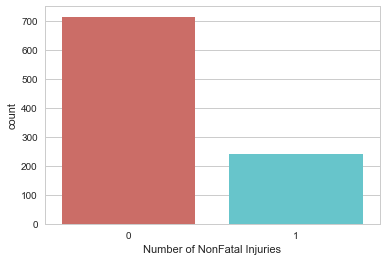

<Figure size 432x288 with 0 Axes>

In [73]:
sns.countplot(x='Number of NonFatal Injuries',data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

We can see that there are 714 crashes with no injuries against 239 crashes that had injuries

In [74]:
df2.groupby('Number of NonFatal Injuries').mean()

,Number of Vehicles,Speed Limit
Number of NonFatal Injuries,,
0,1.844538,28.634454
1,1.799163,29.142259


In [75]:
df2.columns

Index(['Crash Severity', 'Number of NonFatal Injuries', 'Number of Vehicles',
       'Manner of Collision', 'Age of Driver - Youngest Known',
       'Age of Driver - Oldest Known', 'Hit & Run', 'Road Surface',
       'Ambient Light', 'Weather Condition', 'Speed Limit',
       'Roadway Intersection Type'],
      dtype='object')

In [76]:
df2.groupby('Manner of Collision').mean()

,Number of NonFatal Injuries,Number of Vehicles,Speed Limit
Manner of Collision,,,
Angle,0.238462,1.988462,26.653846
Head-on,0.458333,2.041667,26.250000
Not reported,0.250000,1.250000,22.500000
Rear-end,0.249158,2.148148,30.151515
Sideswipe,0.108844,1.986395,27.278912
Single vehicle crash,0.354680,1.068966,31.009852
Unknown,0.176471,1.588235,28.235294


In [77]:
df2.groupby('Weather Condition').mean()

,Number of NonFatal Injuries,Number of Vehicles,Speed Limit
Weather Condition,,,
Clear,0.243433,1.810858,28.450088
Cloudy,0.333333,1.708333,30.416667
Rainy,0.246711,1.921053,28.848684
Sleet/Hail,0.285714,1.714286,22.857143
Snowy,0.300000,1.400000,33.000000
Unknown,0.307692,1.615385,34.230769


In [78]:
df2.groupby('Age of Driver - Youngest Known').mean()

,Number of NonFatal Injuries,Number of Vehicles,Speed Limit
Age of Driver - Youngest Known,,,
16-24,0.290323,1.870968,29.951613
25-44,0.259446,1.921914,29.231738
45-64,0.197531,1.722222,27.469136
65+,0.354839,1.580645,26.129032
<16,0.000000,2.000000,20.000000
>84,0.000000,2.000000,25.000000


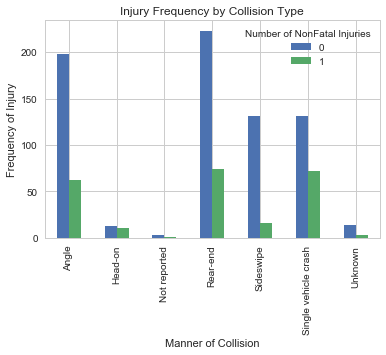

In [79]:
%matplotlib inline
pd.crosstab(df2['Manner of Collision'],df2['Number of NonFatal Injuries']).plot(kind='bar')
plt.title('Injury Frequency by Collision Type')
plt.xlabel('Manner of Collision')
plt.ylabel('Frequency of Injury')
plt.savefig('injuries_vs_collisiontype')

Manner of Collision could be a very good predictor of whether there will be an injury or not

In [80]:
#time to start the RFE process :(
df2.columns

Index(['Crash Severity', 'Number of NonFatal Injuries', 'Number of Vehicles',
       'Manner of Collision', 'Age of Driver - Youngest Known',
       'Age of Driver - Oldest Known', 'Hit & Run', 'Road Surface',
       'Ambient Light', 'Weather Condition', 'Speed Limit',
       'Roadway Intersection Type'],
      dtype='object')

In [81]:
cat_vars=['Crash Severity', 'Manner of Collision', 'Age of Driver - Youngest Known','Age of Driver - Oldest Known',
       'Hit & Run', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Roadway Intersection Type']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    data1=df2.join(cat_list)
    df2=data1

In [82]:
cat_vars=['Crash Severity', 'Manner of Collision', 'Age of Driver - Youngest Known','Age of Driver - Oldest Known',
       'Hit & Run', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Roadway Intersection Type']
df2_vars=df2.columns.values.tolist()
to_keep=[i for i in df2_vars if i not in cat_vars]

In [83]:
data_final=df2[to_keep]
data_final.columns.values

array(['Number of NonFatal Injuries', 'Number of Vehicles', 'Speed Limit',
       'Crash Severity_Major', 'Crash Severity_Medium',
       'Crash Severity_Minor', 'Crash Severity_Unknown',
       'Manner of Collision_Angle', 'Manner of Collision_Head-on',
       'Manner of Collision_Not reported', 'Manner of Collision_Rear-end',
       'Manner of Collision_Sideswipe',
       'Manner of Collision_Single vehicle crash',
       'Manner of Collision_Unknown',
       'Age of Driver - Youngest Known_16-24',
       'Age of Driver - Youngest Known_25-44',
       'Age of Driver - Youngest Known_45-64',
       'Age of Driver - Youngest Known_65+',
       'Age of Driver - Youngest Known_<16',
       'Age of Driver - Youngest Known_>84',
       'Age of Driver - Oldest Known_16-24',
       'Age of Driver - Oldest Known_25-44',
       'Age of Driver - Oldest Known_45-64',
       'Age of Driver - Oldest Known_65+', 'Hit & Run_No',
       'Hit & Run_Yes', 'Road Surface_Dry', 'Road Surface_Ice',
       

In [84]:
data_final_vars=data_final.columns.values.tolist()
y=['Number of NonFatal Injuries']
X=[i for i in data_final_vars if i not in y]

In [85]:
#I'm really hoping this feature selection will work this time

In [86]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [87]:
rfe = RFE(logreg, 10)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)
#Finally WORKED!!
#rfe selected 4,5,6,11,25,34,38,43,46,47

C:\Users\aaronhxzhang\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False  True  True  True False False False False  True False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False  True False False False False  True False False  True  True False
 False False False]
[19 37  6  1  1  1 20 21 42 25  1 24  3  7  8 15 12 41 34 18 30 13 17  9
  1 38 36 35 27 39 26  4 32  1 10 11  2  1 14  5 22 23  1 33 40  1  1 29
 28 16 31]


In [95]:
#The RFE gave 51 true/false responses corresponding to the 51 features in X which were compared against the only feature in y 
#which is 'Number of NonFatal Injuries' (the 51 features do not include 'Number of NonFatal Injuries')

#RFE selected X[3], X[4], X[5], X[10], X[24], X[33], X[37], X[42], X[45], X[46]
X[3], X[4], X[5], X[10], X[24], X[33], X[37], X[42], X[45], X[46]

('Crash Severity_Medium',
 'Crash Severity_Minor',
 'Crash Severity_Unknown',
 'Manner of Collision_Sideswipe',
 'Hit & Run_Yes',
 'Road Surface_Wet',
 'Weather Condition_Clear',
 'Weather Condition_Unknown',
 'Roadway Intersection Type_None',
 'Roadway Intersection Type_T-intersection')

In [96]:
#RFE selected 'Crash Severity_Medium','Crash Severity_Minor','Crash Severity_Unknown','Manner of Collision_Sideswipe','Hit & Run_Yes','Road Surface_Wet','Weather Condition_Clear','Weather Condition_Unknown','Roadway Intersection Type_None','Roadway Intersection Type_T-intersection'